Here’s a detailed explanation of each part of the code to help you understand the purpose of every line. Written and Taken from MLRpractice.ipynb

---

### **1. Importing Libraries**

Before using any functionality, we need to import the required libraries. These libraries provide tools to handle datasets, preprocess data, and build machine learning models. 
- Libraries like `pandas` (not explicitly imported here) are used to load and manipulate data. 
- `sklearn` is a machine learning library offering many algorithms and utilities.

---

### **2. Separating Independent Variables (IV) and Dependent Variable (DV)**

```python
x = df_index.iloc[:, :-1] # Eliminated Last column
y = df_index.iloc[:, -1]  # Selected only Last Column
```

- **Purpose**: To split the dataset into features (independent variables, `x`) and the target (dependent variable, `y`).
  
- **Explanation**:
  - `df_index`: Assumed to be a DataFrame (table of data).
  - `iloc`: A method to select rows and columns by index position.
  - `[:, :-1]`: Selects all rows (`:`) and all columns except the last one (`:-1`), which are features.
  - `[:, -1]`: Selects all rows (`:`) and only the last column (`-1`), which is the target variable.
  
- **Why is this done?**
  - Machine learning models require separation of features (inputs) and labels/targets (outputs) for training.

---

### **3. Importing All Required Libraries**

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
from sklearn.model_selection import cross_val_score
```

- **Purpose**: Import tools for preprocessing, splitting data, building models, and validating them.

1. **`train_test_split`**:
   - Splits the dataset into training and testing parts.

2. **`StandardScaler`**:
   - Standardizes/normalizes the data to have a mean of 0 and a standard deviation of 1.

3. **`LinearRegression`**:
   - A machine learning model for predicting a numerical target using a linear relationship between features and the target.

4. **`cross_val_score`**:
   - A tool to validate the model using cross-validation, checking how well it performs on different parts of the data.

---

### **4. Splitting the Dataset**

```python
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
```

- **Purpose**: To divide the dataset into training and testing subsets.
  
- **Explanation**:
  - `x_train` and `y_train`: Used to train the model (75% of the data by default).
  - `x_test` and `y_test`: Used to evaluate the model (25% of the data by default).
  - `test_size=0.25`: Specifies that 25% of the data is used for testing.
  - `random_state=1`: Ensures the split is reproducible (same split every time the code runs).

---

### **5. Standardizing the Features**

```python
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
```

- **Purpose**: To standardize the data (scale it to a consistent range).
  
- **Explanation**:
  - `StandardScaler()`: Creates a scaler object.
  - `fit_transform()`: Computes the scaling parameters (mean and standard deviation) on `x_train` and applies the transformation.
  - `transform()`: Applies the same transformation (learned from `x_train`) to `x_test`.
  
- **Why is this done?**
  - Many machine learning models are sensitive to the scale of the data.
  - Scaling ensures that features with larger values don’t dominate smaller ones.

---

### **6. Training the Model and Performing Cross-Validation**

```python
cross_validation = cross_val_score(regression, x_train, y_train, scoring='neg_mean_squared_error', cv=3)
```

- **Purpose**: To evaluate the model using cross-validation.
  
- **Explanation**:
  - `regression`: The linear regression model created earlier.
  - `cross_val_score`: Splits the training data into 3 parts (`cv=3`), trains the model on 2 parts, and tests it on the 3rd.
  - `scoring='neg_mean_squared_error'`: Metric used to evaluate the model (negative mean squared error is a common measure for regression).

---

### **7. Predicting Outcomes**

```python
y_pred = regression.predict(x_test)
regression.predict(scalar.transform([[76]]))
```

- **Purpose**: To predict the target values using the trained model.
  
- **Explanation**:
  1. `y_pred = regression.predict(x_test)`:
     - Uses the test data (`x_test`) to predict corresponding target values.
     - `y_pred` contains the predicted outputs.

  2. `regression.predict(scalar.transform([[76]]))`:
     - Predicts the target for a new input (76) after scaling it with `scalar.transform()`.

---

### **Summary of Steps**:
1. **Load and prepare data**: Import libraries, load dataset, and separate features (`x`) and target (`y`).
2. **Split data**: Divide into training and testing sets for evaluation.
3. **Preprocess**: Standardize features to ensure the model performs optimally.
4. **Train and validate**: Train the model (linear regression) and validate it using cross-validation.
5. **Predict**: Use the trained model to predict the outcomes of unseen data (test set or new inputs).

### SLR

In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [82]:
df = pd.read_csv('hweight.csv')

In [83]:
df.head(5)

,Height,Weight
0,168.727006,76.362388
1,197.535715,87.396035
2,186.599697,84.428668
3,179.932924,71.031971
4,157.800932,69.912060


Text(0, 0.5, 'Height')

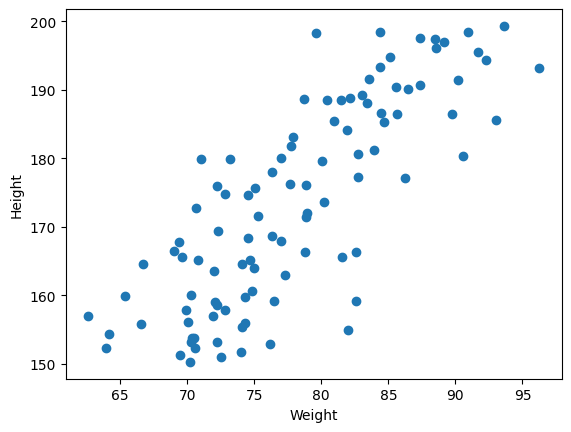

In [84]:
#Scatter Plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')


In [85]:
df.corr()

,Height,Weight
Height,1.000000,0.799623
Weight,0.799623,1.000000


In [86]:
import seaborn as sns 

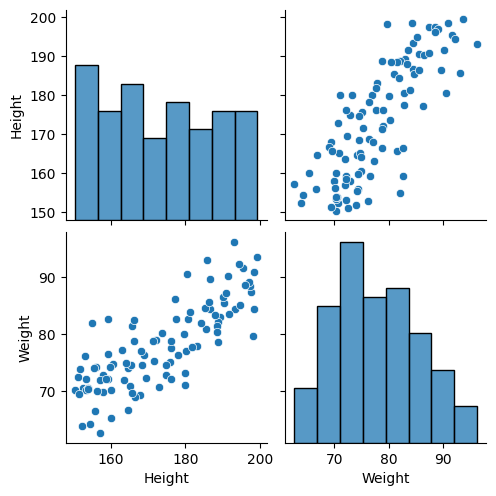

In [87]:
sns.pairplot(df)

**Features Splitting**

In [88]:
# Dividing into Independent and Dependent Features 
#ALWAYS MAKE SURE THAT INDEPNDENT FEATURES SHOULD BE IN THE FORM OF A DATA FRAME/2D-ARRAY
x= df[['Weight']]
# type(x) #pandas.core.frame.DataFrame

# A Dependent feature can be in the form of a series/One D array form ,as it has always only one single column 
y = df['Height']

**Data Splitting**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
#Train-Test Data Splitting 
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [91]:
X_train.shape#It take the 75% Data for Training purpose 

(75, 1)

In [92]:
#Standardization 
#means converting the Data points mean=0 and S.D = 1
from sklearn.preprocessing import StandardScaler


In [93]:
#We Standarize the input Feature as Gradient Decent is calculated on input feature 
# IN short the speed of Alpha means if the units are large like kg it will take more time ,
# to reach the Global minima point to reduce it we are Standardizing the input feature

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [94]:
#Here we do not fit Reason is that we use the same mean and S.D of the training data set in our Test Dataset
# scaler = StandardScaler()
X_test = scaler.transform(X_test)

#IF we do fit_transform here thr mean and standard Deviation for the test Data Again be calculated which can leak information
# about our test Data to Train Data Which we Don't want to do 

**Applying Linear Regression**

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
regression = LinearRegression( )

In [97]:
regression.fit(X_train,Y_train)

LinearRegression()

In [98]:
#Slope means One unit Change in weight will lead to 4.7 unit change in Height
print("Slope/Coeffecient 'm': ",regression.coef_ ) #Slope
# Intercept means at 50.81 the touches the y-axis
print("Intercept 'c': ",regression.intercept_ ) 

Slope/Coeffecient 'm':  [10.73785409]
Intercept 'c':  172.9452324783662


**Plotting the Best-fit line**

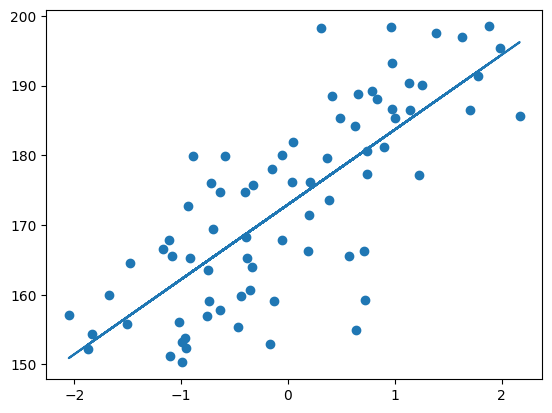

In [99]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train)) 

**Prediction for Test Data**
1.Predicted Height = intercept + Coeffecient(Weight)
2.                = 50.81  + 4.79

In [100]:
y_pred = regression.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [102]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

77.60113905838942
7.635296827302166
8.809150870452237


**R-Sqquared**

In [103]:
# R Squared
from sklearn.metrics import r2_score 

In [104]:
score = r2_score(Y_test,y_pred)
print(score) 

0.7282108760283732


**Adjusted R-squared**

In [105]:
1 - (1 - score) * (len(Y_test)- 1) / (len(Y_test) - X_test.shape[1] - 1)

0.7163939575948242

**With OLS**

In [106]:
import statsmodels.api as sm 

In [107]:
model =sm.OLS(Y_train,X_train).fit()

In [108]:
prediction= model.predict(X_test)
print(prediction)

[ -7.75429633  11.49301866   1.90847173   0.66900391  -0.19929043
   2.2372515   -4.94106536  28.0987125   -7.26603465  -1.56462585
  -3.2116505   19.67387921  14.79935416  16.50712408  -4.63923159
 -11.18623225   6.02945041 -10.56688115   9.20322454  -7.75899363
  16.66716301  22.17757532 -10.63875706  -5.10658747  24.16877823]


In [109]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.010
Method:                 Least Squares   F-statistic:                             0.2845
Date:                Tue, 19 Nov 2024   Prob (F-statistic):                       0.595
Time:                        13:53:26   Log-Likelihood:                         -492.99
No. Observations:                  75   AIC:                                      988.0
Df Residuals:                      74   BIC:                                      990.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Prediction for New Data**

In [114]:
regression.predict(scaler.transform([[76]])) #Reason of this big value is that it is not standardized

c:\Users\Track Computers\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([170.84005198])